In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify


In [135]:
# load inflation data
inflation_data_df = pd.read_excel('./inflation_data/ground_truth/2024/cpi_1NewDec2024.xlsx', sheet_name='Table2', skiprows=1)
inflation_data_df.rename(columns={
    'Unnamed: 0': 'Year',
    'Unnamed: 1': 'Month',
    # Add more columns as needed
}, inplace=True)
inflation_data = inflation_data_df[['Year', 'Month', 'Month-on (%)','Year-on (%)','12-month average (%)']]
# Fill missing values with the previous numeric values
inflation_data.fillna(method='ffill', inplace=True)
inflation_data.dropna(inplace=True)
inflation_data.tail(30)

/tmp/ipykernel_2023042/2428805033.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  inflation_data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_2023042/2428805033.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_2023042/2428805033.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_data.dropna(inplace=True)


,Year,Month,Month-on (%),Year-on (%),12-month average (%)
331,2022,Jul,1.816533,19.643020,16.754854
332,2022,Aug,1.769572,20.524842,17.070230
333,2022,Sep,1.357880,20.773688,17.432039
334,2022,Oct,1.243997,21.087115,17.864947
335,2022,Nov,1.394793,21.465639,18.372038
336,2022,Dec,1.714771,21.343795,18.847188
337,2023,Jan,1.868014,21.816325,19.361891
338,2023,Feb,1.708670,21.909733,19.872647
339,2023,Mar,1.856444,22.043274,20.374588
340,2023,Apr,1.909500,22.222247,20.816145


/tmp/ipykernel_2023042/3816647839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_data['Month_Year'] = inflation_data['Month'] + ' ' + inflation_data['Year'].astype(str)


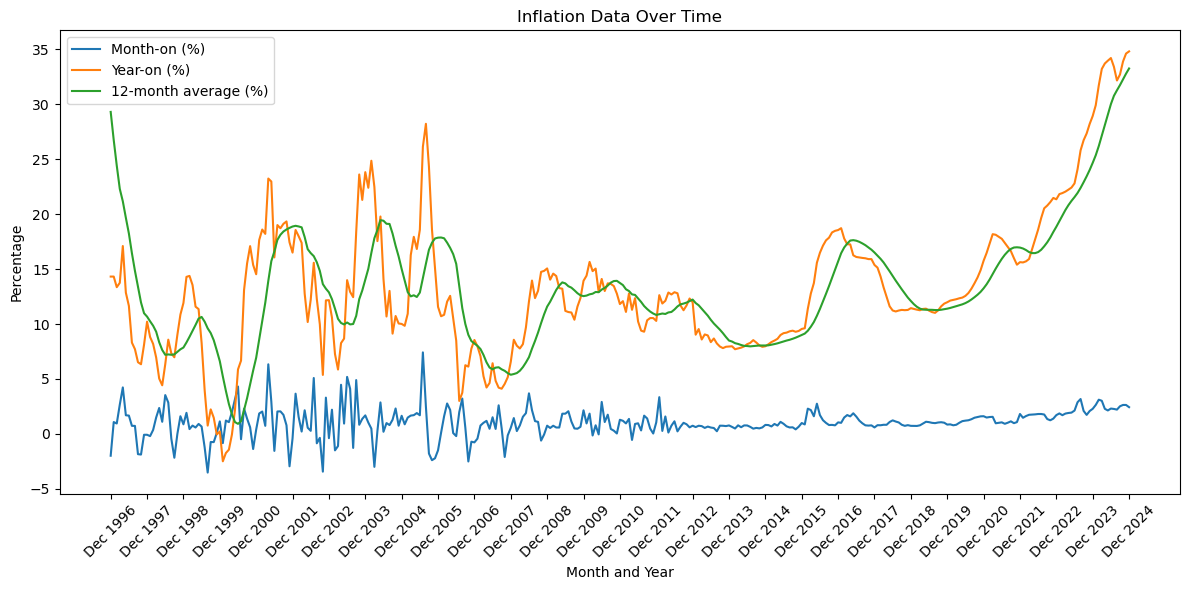

In [136]:
#  Combine 'Month' and 'Year' into a single column for plotting
inflation_data['Month_Year'] = inflation_data['Month'] + ' ' + inflation_data['Year'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(inflation_data['Month_Year'], inflation_data['Month-on (%)'], label='Month-on (%)')
plt.plot(inflation_data['Month_Year'], inflation_data['Year-on (%)'], label='Year-on (%)')
plt.plot(inflation_data['Month_Year'], inflation_data['12-month average (%)'], label='12-month average (%)')

plt.xlabel('Month and Year')
plt.ylabel('Percentage')
plt.title('Inflation Data Over Time')

# Format x-axis to be cleaner by skipping some xticks
xticks = inflation_data['Month_Year'][::12]  # Display every 12th tick
plt.xticks(ticks=xticks, rotation=45)

plt.legend()
plt.tight_layout()
plt.savefig('./inflation.png')
plt.show()

In [137]:
! ls -lah



total 5.9M
drwxrwxr-x 5 martinsawojide martinsawojide 4.0K Mar 17 23:48  .
drwxr-xr-x 8 martinsawojide martinsawojide 4.0K Mar  5 11:17  ..
-rw-r--r-- 1 martinsawojide martinsawojide 744K Mar  6 07:08 'amini_dsa.ipynb - Martins Copy.ipynb'
-rw-r--r-- 1 martinsawojide martinsawojide 211K Feb 19 19:53  Annotated_Bibliography_Sample.png
-rw-r--r-- 1 martinsawojide martinsawojide 759K Mar 17 23:48  EDA.ipynb
-rw-rw-r-- 1 martinsawojide martinsawojide 175K Mar 17 18:58 'Final Project Guidelines.pdf'
drwxr-xr-x 3 martinsawojide martinsawojide 4.0K Mar 12 23:58  inflation_data
-rw-r--r-- 1 martinsawojide martinsawojide 1.1M Mar 17 12:10 'Inflation Nowcasting MBD.pptx'
-rw-r--r-- 1 martinsawojide martinsawojide 2.1M Mar 17 03:24  Inflation_Nowcast_Nigeria.pptx
-rw-r--r-- 1 martinsawojide martinsawojide 122K Mar 17 23:48  inflation.png
-rw-r--r-- 1 martinsawojide martinsawojide  25K Mar 17 22:02 'Midterm Milestone Rubric.pdf'
-rw-r--r-- 1 martinsawojide martinsawojide  21K Mar 17 23:40  midterm

In [138]:
food_prices = pd.read_csv('./topic/food_prices.csv', skiprows=1)
price = pd.read_csv('./topic/price.csv', skiprows=1)
inflation = pd.read_csv('./topic/inflation.csv', skiprows=1)
fuel_pump = pd.read_csv('./topic/fuel_pump.csv', skiprows=1)
price.head(20)

,Month,Price: (Nigeria)
0,2009-01,30
1,2009-02,28
2,2009-03,30
3,2009-04,29
4,2009-05,30
5,2009-06,31
6,2009-07,32
7,2009-08,33
8,2009-09,32
9,2009-10,32


In [139]:
combined_df = pd.concat([price, food_prices, inflation, fuel_pump], axis=1)
combined_dataframe = combined_df[['Month', 'Price: (Nigeria)', 'food prices: (Nigeria)', 'Inflation: (Nigeria)', 'Fuel pump: (Nigeria)']]
df = combined_dataframe.iloc[:, [3, 4, 5, 6, 7]]
display(df)


,Month,Price: (Nigeria),food prices: (Nigeria),Inflation: (Nigeria),Fuel pump: (Nigeria)
0,2009-01,30,0,70,0
1,2009-02,28,0,68,0
2,2009-03,30,0,61,0
3,2009-04,29,0,78,0
4,2009-05,30,0,76,0
...,...,...,...,...,...
187,2024-08,96,74,25,68
188,2024-09,97,54,27,81
189,2024-10,88,53,28,80
190,2024-11,95,66,24,75


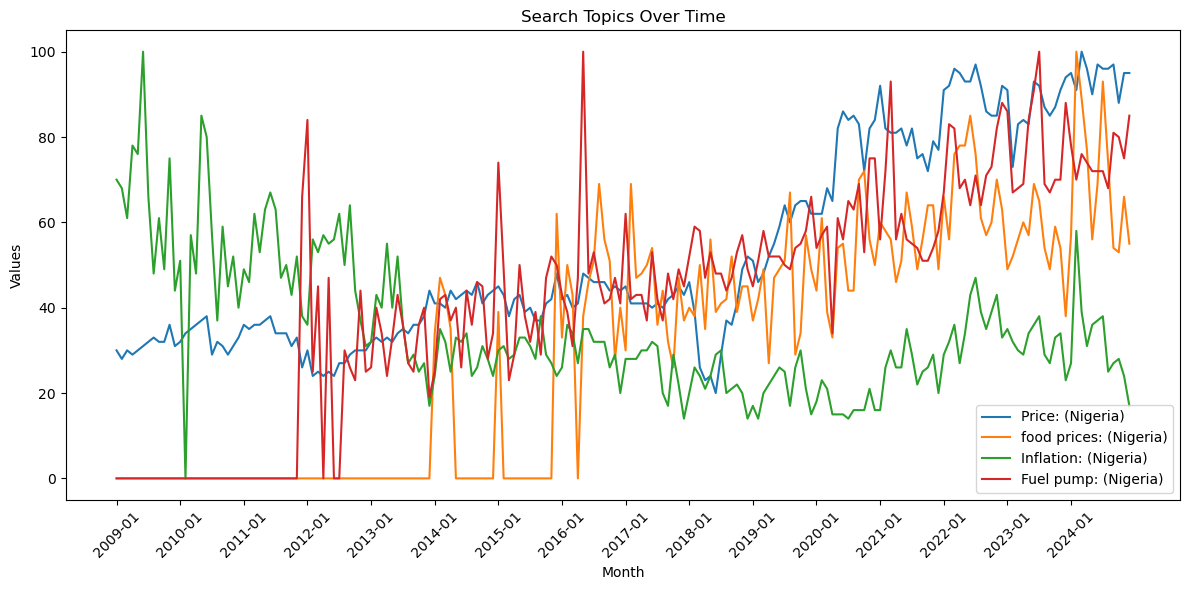

In [140]:
# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['Month'], df['Price: (Nigeria)'], label='Price: (Nigeria)')
plt.plot(df['Month'], df['food prices: (Nigeria)'], label='food prices: (Nigeria)')
plt.plot(df['Month'], df['Inflation: (Nigeria)'], label='Inflation: (Nigeria)')
plt.plot(df['Month'], df['Fuel pump: (Nigeria)'], label='Fuel pump: (Nigeria)')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Search Topics Over Time')
xticks = df['Month'][::12]  # Display every 12th tick
plt.xticks(ticks=xticks, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('./search_1.png')
plt.show()

In [141]:
# combined topics data from google trend

multiline = pd.read_csv('./topic/multiTimeline.csv', skiprows=1)
multiline['Food prices: (Nigeria)'] = multiline['Food prices: (Nigeria)'].replace('<1', '0.5')
multiline['Price: (Nigeria)'] = multiline['Price: (Nigeria)'].replace('<1', '0.5')
multiline['Inflation: (Nigeria)'] = multiline['Inflation: (Nigeria)'].replace('<1', '0.5')
multiline['Fuel pump: (Nigeria)'] = multiline['Fuel pump: (Nigeria)'].replace('<1', '0.5')
df = multiline
display(multiline)

,Month,Price: (Nigeria),Inflation: (Nigeria),Fuel pump: (Nigeria),Food prices: (Nigeria)
0,2009-01,30,2,0,0
1,2009-02,28,2,0,0
2,2009-03,30,2,0,0
3,2009-04,29,2,0,0
4,2009-05,30,2,0,0
...,...,...,...,...,...
187,2024-08,96,1,0.5,0.5
188,2024-09,97,1,0.5,0.5
189,2024-10,88,1,0.5,0.5
190,2024-11,95,1,0.5,0.5


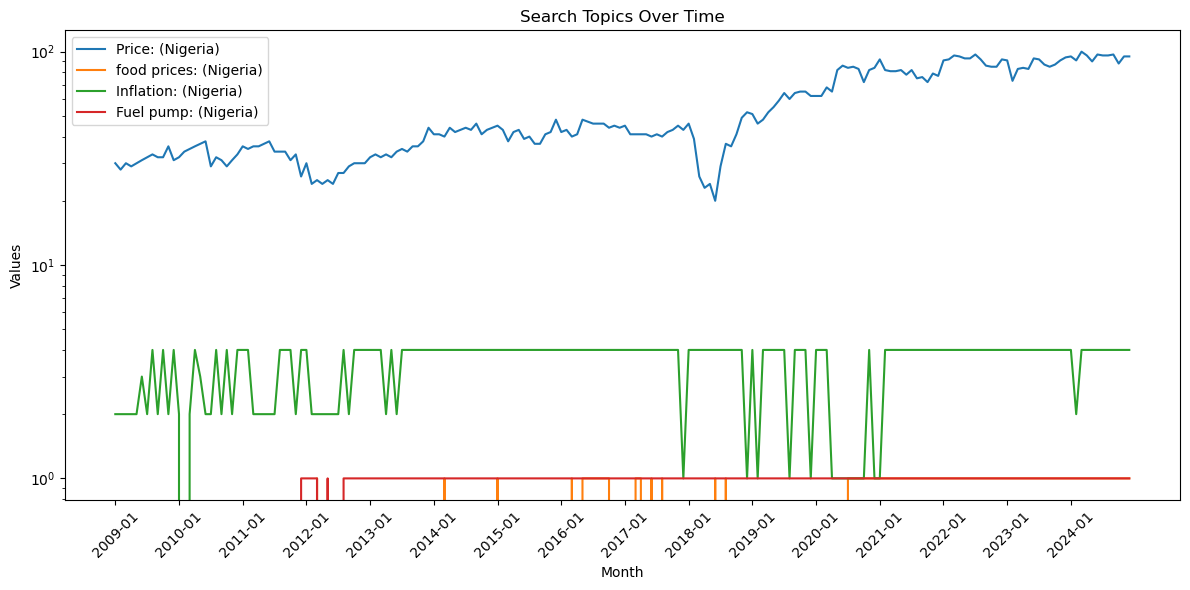

In [142]:
# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['Month'], df['Price: (Nigeria)'], label='Price: (Nigeria)')
plt.plot(df['Month'], df['Food prices: (Nigeria)'], label='food prices: (Nigeria)')
plt.plot(df['Month'], df['Inflation: (Nigeria)'], label='Inflation: (Nigeria)')
plt.plot(df['Month'], df['Fuel pump: (Nigeria)'], label='Fuel pump: (Nigeria)')

plt.xlabel('Month')
plt.ylabel('Values')
plt.yscale('log')
plt.title('Search Topics Over Time')
xticks = df['Month'][::12]  # Display every 12th tick
plt.xticks(ticks=xticks, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('./search_2.png')
plt.show()

In [143]:
# load related queries csv
food_prices_q = pd.read_csv('./topic/query_food_prices.csv')
fuel_pump_q = pd.read_csv('./topic/query_fuel_pump.csv')
inflation_q = pd.read_csv('./topic/query_inflation.csv')
price_q = pd.read_csv('./topic/query_price.csv')

In [144]:
food_prices_q.head()

,relatedQueries (food prices),count
0,food prices,100
1,food price,78
2,prices of food,49
3,food cost,29
4,food price list,11


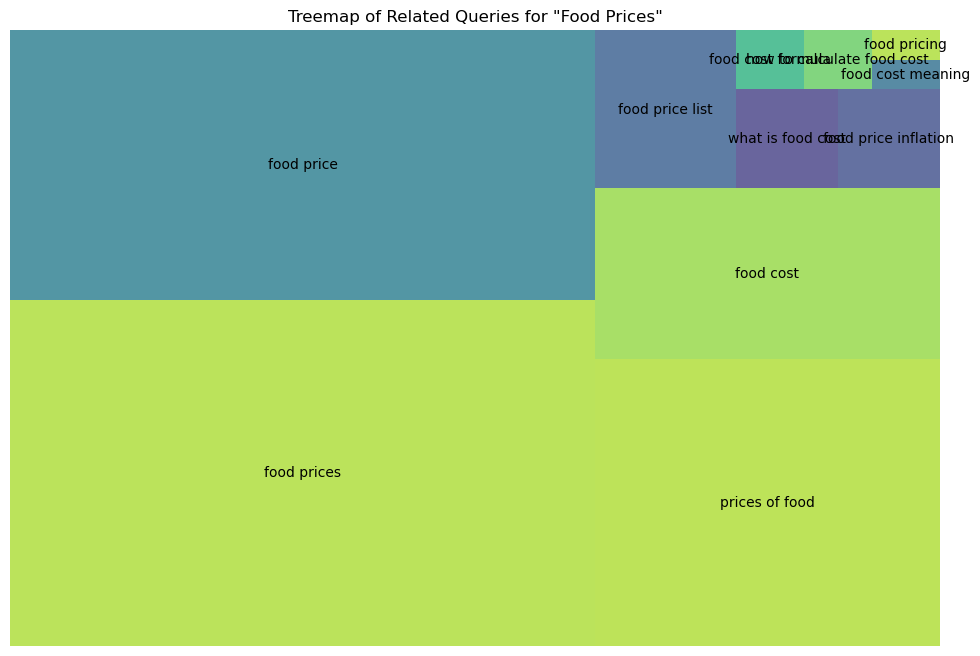

In [145]:
# Define a threshold for displaying labels
threshold = 5000  # Adjust this value as needed

# Create a list of labels, replacing small values with an empty string
labels = [label if size > threshold else '' for label, size in zip(food_prices_q['relatedQueries (food prices)'], food_prices_q['count'])]
# Create a treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=food_prices_q['count'], label=food_prices_q['relatedQueries (food prices)'], alpha=0.8)
plt.axis('off')
plt.title('Treemap of Related Queries for "Food Prices"')
plt.savefig('./tm_food.png')
plt.show()

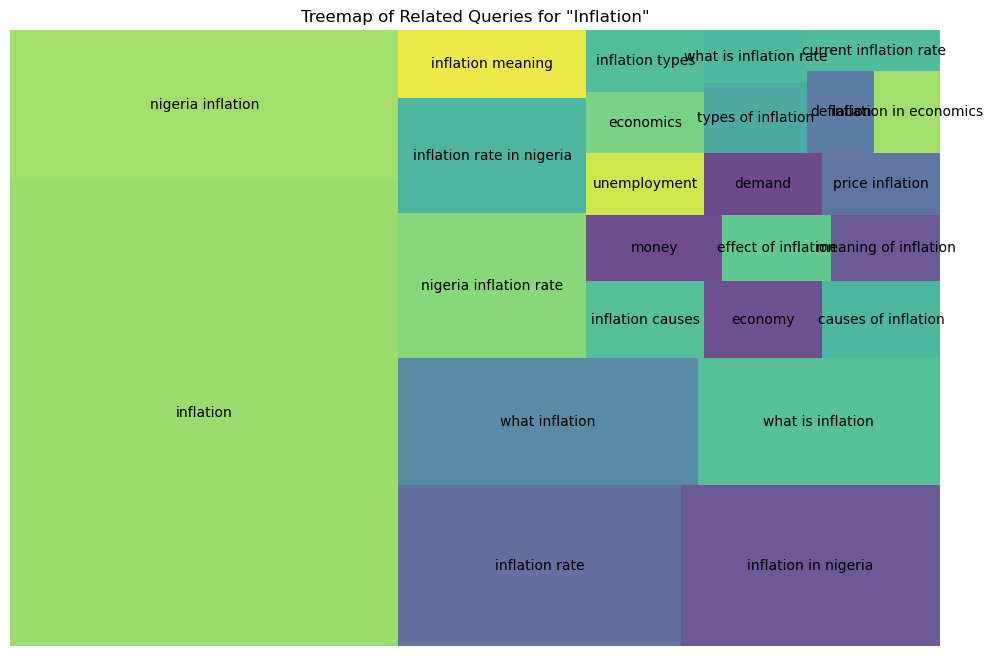

In [146]:
# Define a threshold for displaying labels
threshold = 5000  # Adjust this value as needed

# Create a list of labels, replacing small values with an empty string
labels = [label if size > threshold else '' for label, size in zip(inflation_q['relatedQueries (inflation)'], inflation_q['count'])]
# Create a treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=inflation_q['count'], label=inflation_q['relatedQueries (inflation)'], alpha=0.8)
plt.axis('off')
plt.title('Treemap of Related Queries for "Inflation"')
plt.savefig('./tm_inflation.png')
plt.show()

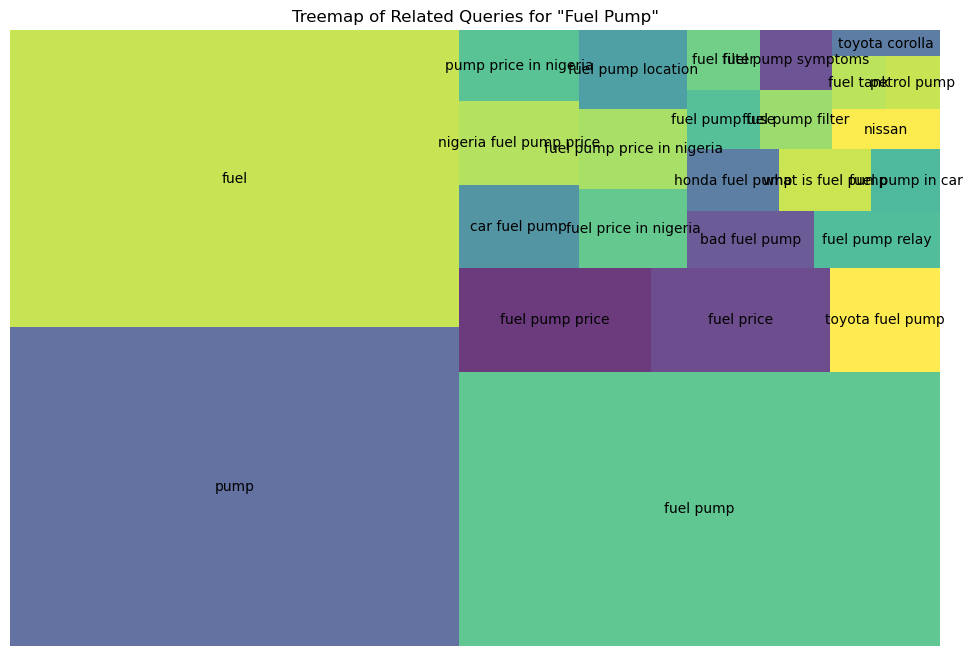

In [147]:
# Define a threshold for displaying labels
threshold = 5000  # Adjust this value as needed

# Create a list of labels, replacing small values with an empty string
labels = [label if size > threshold else '' for label, size in zip(fuel_pump_q['relatedQueries (fuel pump)'], fuel_pump_q['count'])]
# Create a treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=fuel_pump_q['count'], label=fuel_pump_q['relatedQueries (fuel pump)'], alpha=0.8)
plt.axis('off')
plt.title('Treemap of Related Queries for "Fuel Pump"')
plt.savefig('./tm_fuel_pump.png')
plt.show()

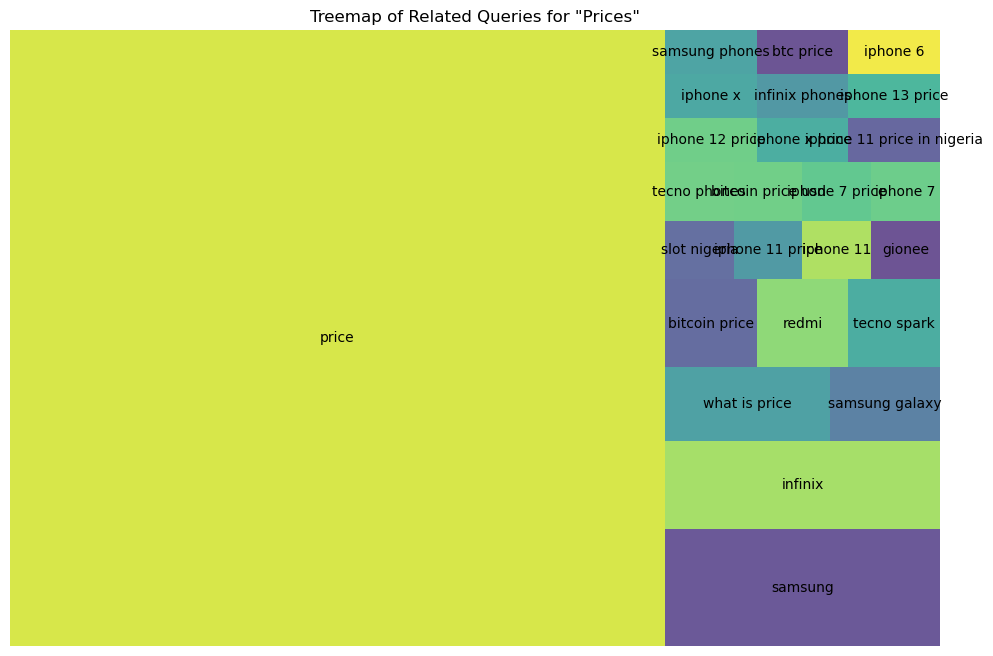

In [148]:
# Define a threshold for displaying labels
threshold = 5000  # Adjust this value as needed

# Create a list of labels, replacing small values with an empty string
labels = [label if size > threshold else '' for label, size in zip(price_q['relatedQueries (price)'], price_q['count'])]
# Create a treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=price_q['count'], label=price_q['relatedQueries (price)'], alpha=0.8)
plt.axis('off')
plt.title('Treemap of Related Queries for "Prices"')
plt.savefig('./tm_prices.png')
plt.show()